In [27]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

# 1

In [42]:
N_SAMPLES = 4000
N_THRESHOLDS = 40
CLASS_1_RATIO = 0.08

y_true = np.array([
    int(random.random()<=CLASS_1_RATIO)
    for i in range(N_SAMPLES)
])
y_pred = np.array([
    # formula to fake a not so bad prediction
    random.triangular(0,1, 0.6 if y_true[i] else 0.2)
    for i in range(N_SAMPLES)
])

THRESHOLDS = [ i/float(N_THRESHOLDS) for i in range(N_THRESHOLDS+1) ]

In [43]:
y_pred

array([0.24632202, 0.54998209, 0.75020374, ..., 0.47043696, 0.3460448 ,
       0.93099252])

# 2

In [37]:
def cm(y_true, y_pred, threshold =0.5):
    return confusion_matrix(
        y_true,
        y_pred>=threshold
    )
def confusion_curve(y_true, y_pred):
    return [
        cm(y_true, y_pred, thr).flatten()
        for thr in THRESHOLDS
    ]

print("Confusion matrix at 50%:\n", cm(y_true, y_pred))

Confusion matrix at 50%:
 [[2517 1130]
 [ 151  202]]


# 3

In [38]:
CURVES = pd.DataFrame(
    confusion_curve(y_true, y_pred),
    columns = [ 'TN', 'FP', 'FN', 'TP', ]
) / N_SAMPLES  # Normalized per sample

CURVES['threshold'] = THRESHOLDS

In [39]:
CURVES

,TN,FP,FN,TP,threshold
0,0.00000,0.91175,0.00000,0.08825,0.00
1,0.00000,0.91175,0.00025,0.08800,0.01
2,0.00150,0.91025,0.00025,0.08800,0.02
3,0.00475,0.90700,0.00025,0.08800,0.03
4,0.00800,0.90375,0.00050,0.08775,0.04
...,...,...,...,...,...
96,0.90975,0.00200,0.08825,0.00000,0.96
97,0.91075,0.00100,0.08825,0.00000,0.97
98,0.91125,0.00050,0.08825,0.00000,0.98
99,0.91150,0.00025,0.08825,0.00000,0.99


# 4

In [40]:
# W0 = volume of interests that are paid back
# W1 = estimation of the averaged capital lost for bad customers
# if W1/W0 penalty is lower than (1/class1ratio - 1) then gains are always positive
#    (8% => W1/W0 = 11.5)
# but it doesn't mean maximal gain at any threshold!!
################
W0 =   7000.0  # penalty=12.5
W1 = 100000.0  #
################

CURVES['EARNED']     = W0*CURVES.TN
CURVES['NOT_EARNED'] = W0*CURVES.FP
CURVES['LOST']       = W1*CURVES.FN
CURVES['GAIN']       = CURVES.EARNED - CURVES.LOST
CURVES['MAX_GAIN']   = CURVES.EARNED + CURVES.NOT_EARNED

# 5

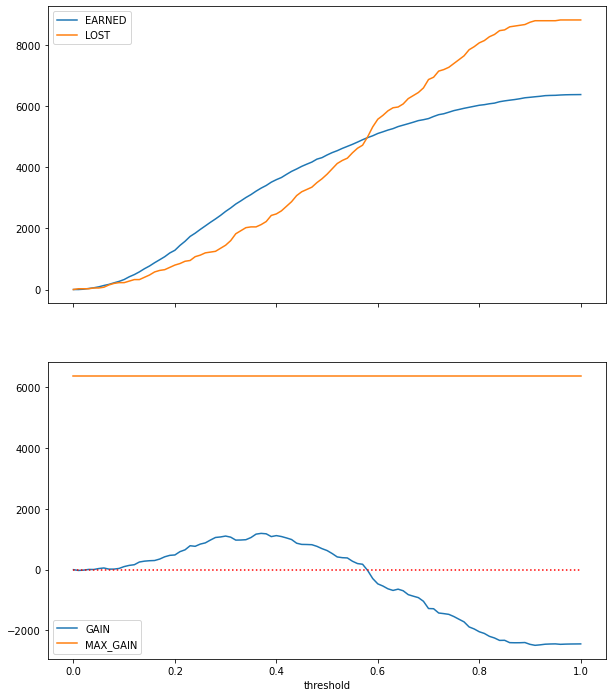

In [41]:
fig, ax = plt.subplots(2, sharex=True, figsize =(10, 12))

CURVES.plot(ax=ax[0], x='threshold', y=['EARNED', 'LOST'])
CURVES.plot(ax=ax[1], x='threshold', y=['GAIN', 'MAX_GAIN'])
ax[1].plot([0,1],[0,0], 'r:')